In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import ingest
import numpy as np
import pandas as pd
df = ingest.setup('../../valid/capture/capture1')

Dropped 1 outlier coordinate


In [7]:
# Generate bearings for each pass
import warnings
from localization_error import error, error_methods
warnings.filterwarnings('ignore')
errors = error(df, 'pchip')

HBox(children=(IntProgress(value=0, description='Preparing data', max=4342), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Interpolating', max=4342), HTML(value='')))

In [8]:
from itertools import combinations
import vector_error

## Process and create location_error.csv - takes hours! Only do this when necessary
combs = [x for l in range(2,4) for x in combinations(pd.unique(df.test), l)]
vector_errors = vector_error.error(combs, df, errors, 'location_error.csv')

HBox(children=(IntProgress(value=0, description='Preparing', max=5848250), HTML(value='')))

In [1]:
vector_errors = pd.read_csv('location_error.csv')

NameError: name 'pd' is not defined

In [120]:
import plotly.plotly as py
from plotly.graph_objs import *

import pandas as pd

mapbox_access_token = 'pk.eyJ1IjoiZWxicmFkZm9yZCIsImEiOiJjamNoMTgzcm0yMW9uMzNtdHQxMGVmMm85In0.3Meb68eWCi1bDyuKvvB9JQ'

TEST_LOCS = {test: vectors.get_point(test) for test in pd.unique(df.test)}
BSSID_LOCS = {bssid: capmap.get_bssid_coord(bssid) for bssid in pd.unique(df.bssid)}

data = Data([
    Scattermapbox(
        lat=vector_errors.,
        lon=,
        mode='markers',
        marker=Marker(
            size=1,
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
    ),
    Scattermapbox(
        lat=[coord.ravel()[0] for coord in TEST_LOCS.values()],
        lon=[coord.ravel()[1] for coord in TEST_LOCS.values()],
        mode='markers',
        marker=Marker(
            size=17,
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
        text=list(BSSID_LOCS.keys()),
        hoverinfo='text'
    ),
    Scattermapbox(
        lat=[coord.ravel()[0] for coord in BSSID_LOCS.values()],
        lon=[coord.ravel()[1] for coord in BSSID_LOCS.values()],
        mode='markers',
        marker=Marker(
            size=17,
            color='rgb(0, 0, 255)',
            opacity=0.7
        ),
        text=list(TEST_LOCS.keys()),
        hoverinfo='text'
    )]
)
    
layout = Layout(
    title='Test Locations',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=39.782765,
            lon=-84.083040
        ),
        pitch=0,
        zoom=16.5,
        style='satellite'
    ),
)

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Experiment Environment')


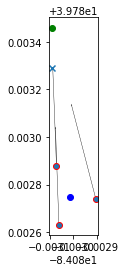

RESEARCH_MULLINS_7


In [12]:
import vectors, capmap

# Get 3 random results from the errors list
index = len(pd.unique(errors['pass']))
passes = np.random.randint(index,size=(3,1))
bssids = pd.unique(errors.bssid)
bssid = bssids[np.random.randint(len(bssids))]
rays = []
for i, p in enumerate(passes):
    p = errors[(errors['test']=='capture-'+str(i+1)) & (errors['pass']==p[0]) & (errors['method']=='pchip') & (errors['bssid']==bssid)]
    lat = p.lat.values[0]
    lon = p.lon.values[0]
    bearing = p.bearing.values[0]
    S = np.array([[lon, lat]])
    D = vectors.bearing_to_vector(bearing)
    rays.append((S,D))

# Get an origin
ray_start_positions = []    
for ray in rays:
    ray_start_positions.append(ray[0])
origin = np.stack(ray_start_positions).mean(axis=0)

# Get an object location
_lat = pd.unique(capmap.bearings[capmap.bearings['bssid'] == bssid]['lat_ap'])[0]
_lon = pd.unique(capmap.bearings[capmap.bearings['bssid'] == bssid]['lon_ap'])[0]
obj = np.array([[_lon, _lat]])

vectors.locate_real_rays(rays, origin, obj)
print(capmap.get_names_from_bssid(bssid, True))